In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
one_df = pd.merge(city_df, ride_df, on = 'city', how = 'outer')

# Display the data table for preview
one_df = one_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
one_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

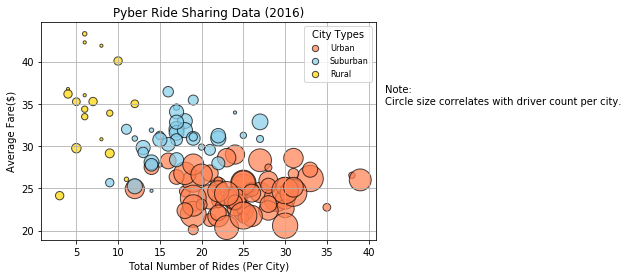

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Urban
urban = one_df.loc[one_df['type'] == 'Urban'].groupby('city')
x_urban = urban['ride_id'].count()
y_urban = urban['fare'].mean()
s_urban = urban['driver_count'].mean() * 10

# Suburban
sub = one_df.loc[one_df['type'] == 'Suburban'].groupby('city')
x_sub = sub['ride_id'].count()
y_sub = sub['fare'].mean()
s_sub = sub['driver_count'].mean() * 10

# Rural
rural = one_df.loc[one_df['type'] == 'Rural'].groupby('city')
x_rural = rural['ride_id'].count()
y_rural = rural['fare'].mean()
s_rural = rural['driver_count'].mean() * 10

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, marker = 'o', facecolor = 'coral', edgecolor = 'black',
            alpha = 0.7, s = s_urban, label = 'Urban')
plt.scatter(x_sub, y_sub, marker = 'o', facecolor = 'skyblue', edgecolor = 'black',
            alpha = 0.7, s = s_sub, label = 'Suburban')
plt.scatter(x_rural, y_rural, marker = 'o', facecolor = 'gold', edgecolor = 'black',
            alpha = 0.7, s = s_rural, label = 'Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid()

# Create a legend
legend = plt.legend(loc = 'best', title = 'City Types', fontsize = 8)
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42, 35,'Note:\nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('images/pyber_bubble.png')

# Show plot
plt.show()

## Total Fares by City Type

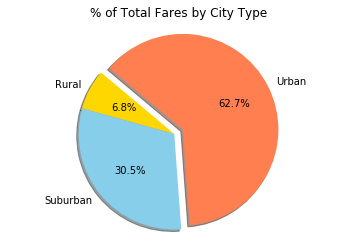

In [3]:
# Calculate Type Percents
total_fares = one_df['fare'].sum()
typeCity = one_df.groupby(['type'])
farePercent = typeCity['fare'].sum() / total_fares

# Build Pie Chart
labels = farePercent.index
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1)

plt.pie(farePercent, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('% of Total Fares by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('images/total_fares.png')

# Show Figure
plt.show()

## Total Rides by City Type

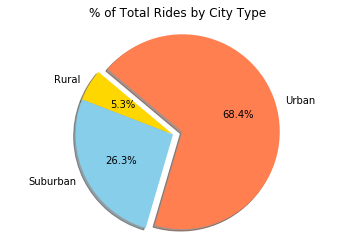

In [4]:
# Calculate Ride Percents
total_rides = one_df['ride_id'].count()
ridePercent = typeCity['ride_id'].count() / total_rides

# Build Pie Chart
plt.pie(ridePercent, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('images/total_rides.png')

# Show Figure
plt.show()

## Total Drivers by City Type

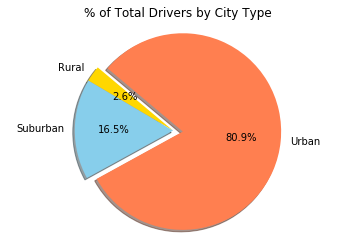

In [5]:
# Calculate Driver Percents
driver_df = one_df[['city', 'driver_count', 'type']].drop_duplicates('city')
del driver_df['city']
driver_df = driver_df.groupby('type').sum()
total_drivers = driver_df['driver_count'].sum()
driverPercent = driver_df['driver_count'] / total_drivers


# Build Pie Charts
plt.pie(driverPercent, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Save Figure
plt.savefig('images/total_drivers.png')

# Show Figure
plt.show()